In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
# import cv2 as cv
from PIL import Image

In [2]:
data =[]
labels = []
classes = 43 
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\User\\Traffic_Project'

In [4]:
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape) 

(39209, 30, 30, 3) (39209,)


In [6]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

In [10]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape = X_train.shape[1:], activation = 'relu')),
model.add(Conv2D(32, (5,5), activation = 'relu')),
model.add(MaxPool2D((3,3))),
model.add(Dropout(0.25)),
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')), 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')), 
model.add(MaxPool2D(pool_size=(2,2))), 
model.add(Dropout(rate=0.25)), 
model.add(Flatten()), 
model.add(Dense(256, activation='relu')), 
model.add(Dropout(rate=0.5)),
# We have 43 classes that's why we have defined 43in the dense
model.add(Dense(43, activation='softmax'))

In [11]:
#Compilation of the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 10 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 107s 109ms/step - loss: 2.6660 - accuracy: 0.2874 - val_loss: 1.7698 - val_accuracy: 0.4727
Epoch 2/10
981/981 [==============================] - 103s 105ms/step - loss: 1.5610 - accuracy: 0.5117 - val_loss: 0.8415 - val_accuracy: 0.7405
Epoch 3/10
981/981 [==============================] - 102s 104ms/step - loss: 0.9656 - accuracy: 0.6977 - val_loss: 0.4194 - val_accuracy: 0.8768
Epoch 4/10
981/981 [==============================] - 114s 116ms/step - loss: 0.6841 - accuracy: 0.7909 - val_loss: 0.2960 - val_accuracy: 0.9216
Epoch 5/10
981/981 [==============================] - 115s 118ms/step - loss: 0.5579 - accuracy: 0.8398 - val_loss: 0.3067 - val_accuracy: 0.9098
Epoch 6/10
981/981 [==============================] - 106s 108ms/step - loss: 0.4915 - accuracy: 0.8624 - val_loss: 0.1530 - val_accuracy: 0.9568
Epoch 7/10
981/981 [==============================] - 97s 99ms/step - loss: 0.4109 - accuracy: 0.8845 - val_loss: 0.2350 - v

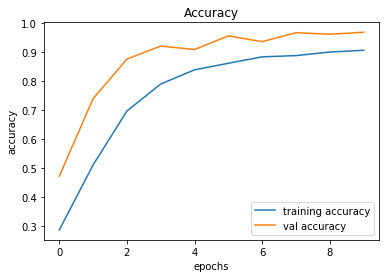

In [12]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

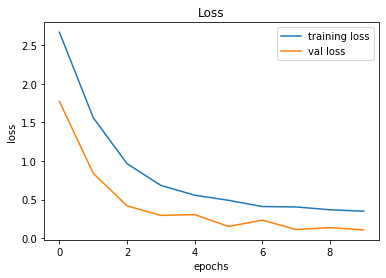

In [13]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [15]:
X_test, label = testing('Test.csv')

In [16]:
Y_pred = model.predict_classes(X_test)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9356294536817102


In [18]:
model.save("./training/TSR.h5")

In [19]:
import os
from tensorflow.keras.models import load_model
model = load_model('./training/TSR.h5')

In [20]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Bumpy road


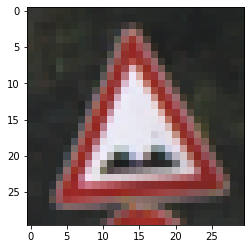

In [22]:
plot,prediction = test_on_img(r'C:\Users\User\Traffic_Project\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()